## Forest fires in the northeast region of Portugal
Data set: https://archive.ics.uci.edu/ml/datasets/forest+fires

Zadaniem jest klasyfikacja względem określonych danych np. temperatury lub np. obszaru.

Wersja z mniejszą ilością atrybutów

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import tree

## Reading the data
5. FFMC - Fine Fuel Moisture Code: 18.7 to 96.20<br>
6. DMC - Duff Moisture Code: 1.1 to 291.3<br>
7. DC - Drought Code: 7.9 to 860.6<br>
8. ISI - Initial Spread Index: 0.0 to 56.10<br>
9. temp - temperature in Celsius degrees: 2.2 to 33.30<br>

In [3]:
path = 'forestfires.csv'
names = ['FFMC', 'DMC', 'DC', 'ISI', 'temp']
dataset = pd.read_csv(path, usecols=['FFMC', 'DMC', 'DC', 'ISI', 'temp'])
dataset.head()


,FFMC,DMC,DC,ISI,temp
0,86.2,26.2,94.3,5.1,8.2
1,90.6,35.4,669.1,6.7,18.0
2,90.6,43.7,686.9,6.7,14.6
3,91.7,33.3,77.5,9.0,8.3
4,89.3,51.3,102.2,9.6,11.4


## Preprocessing
x = attributes, y = labels

In [15]:
cols = list(dataset.columns.values)
x = dataset.iloc[:, :4].values
yf = dataset.iloc[:, -1].values
yi = yf.round(0).astype(int) # converting floats to int
y = [1 if y_ > 15 else 0 for y_ in yi] # to test if I can get better score, temp has been divided to two thresholds

## Dividing a Dataset into Training and Validation Samples

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 82)

## Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Prediction

In [10]:
y_pred = classifier.predict(x_test)
print(y_pred)


[0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1]


In [11]:
score = classifier.score(x_test, y_test)
score

0.8557692307692307

## Algorithm Evaluation

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14 12]
 [ 3 75]]
              precision    recall  f1-score   support

           0       0.82      0.54      0.65        26
           1       0.86      0.96      0.91        78

    accuracy                           0.86       104
   macro avg       0.84      0.75      0.78       104
weighted avg       0.85      0.86      0.84       104



## Determining the depth of the tree 

In [13]:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    accuracy.append(score)

Text(0, 0.5, 'Accuracy')

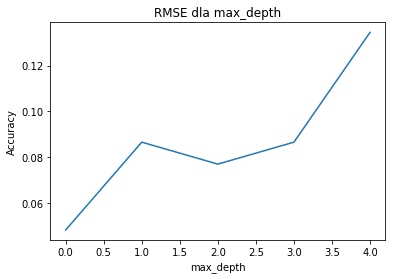

In [60]:
plt.plot(accuracy)
plt.title('RMSE dla max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

[Text(170.79324324324327, 199.32, 'X[2] <= -0.805\ngini = 0.372\nsamples = 413\nvalue = [102, 311]'),
 Text(88.22432432432433, 163.07999999999998, 'X[0] <= -0.209\ngini = 0.404\nsamples = 89\nvalue = [64, 25]'),
 Text(36.1945945945946, 126.83999999999999, 'X[1] <= -1.691\ngini = 0.147\nsamples = 50\nvalue = [46, 4]'),
 Text(18.0972972972973, 90.6, 'X[2] <= -1.874\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(9.04864864864865, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(27.145945945945947, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(54.29189189189189, 90.6, 'X[2] <= -1.986\ngini = 0.117\nsamples = 48\nvalue = [45, 3]'),
 Text(45.24324324324325, 54.359999999999985, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(63.340540540540545, 54.359999999999985, 'X[2] <= -1.889\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(54.29189189189189, 18.119999999999976, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(72.3891891891892, 18.

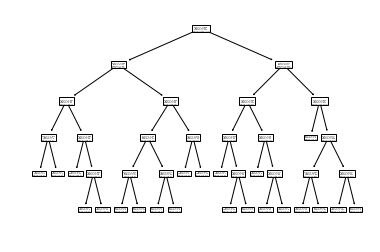

In [14]:
tree.plot_tree(classifier.fit(x_train, y_train)) 